In [166]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

# Data Preprocessing

### 1. Read In data

In [167]:
BookClub = pd.read_excel('CharlesBookClub-Project1.xlsx', sheet_name="CharlesBookClub")

In [168]:
BookClub.head(8)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297.0,14.0,2.0,22.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0,0,5,4,2,0,1
1,2,29,0,128.0,8.0,2.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,4,3,2,0,1
2,3,46,1,138.0,22.0,7.0,56.0,2.0,1.0,2.0,...,1.0,0.0,0.0,0,2,4,4,3,0,1
3,4,47,1,228.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,5,1,1,0,1
4,5,51,1,257.0,10.0,1.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,5,3,1,0,1
5,6,60,1,145.0,6.0,2.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,4,2,2,0,1
6,7,61,1,190.0,16.0,1.0,16.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0,1,4,4,1,0,1
7,8,79,1,187.0,14.0,1.0,14.0,1.0,NaN,0.0,...,0.0,0.0,0.0,0,0,4,4,1,0,1


### 2.1 Missing Data

In [169]:
def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

percent_missing(BookClub).head()

FirstPurch    0.01975
DoItYBks      0.01425
F             0.01350
YouthBks      0.01075
M             0.00950
dtype: float64

### 2.2 Impute value using Median & Round


In [173]:
BCFill_df = BookClub.fillna(BookClub.median())
percMiss = percent_missing(BCFill_df)
pd.DataFrame(percMiss.astype(int))

,0
No_Florence,0
Yes_Florence,0
ID#,0
Gender,0
M,0
R,0
F,0
FirstPurch,0
ChildBks,0
YouthBks,0


In [172]:
BCFill_df.head(8)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297.0,14.0,2.0,22.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0,0,5,4,2,0,1
1,2,29,0,128.0,8.0,2.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,4,3,2,0,1
2,3,46,1,138.0,22.0,7.0,56.0,2.0,1.0,2.0,...,1.0,0.0,0.0,0,2,4,4,3,0,1
3,4,47,1,228.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,5,1,1,0,1
4,5,51,1,257.0,10.0,1.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,5,3,1,0,1
5,6,60,1,145.0,6.0,2.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,4,2,2,0,1
6,7,61,1,190.0,16.0,1.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,4,4,1,0,1
7,8,79,1,187.0,14.0,1.0,14.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,4,4,1,0,1


### 3. Summary Statistics


In [126]:
# Create a new dataset containing mean, min, max, standard deviation, etc. of M,R,F
new_df = pd.DataFrame({'mean': BCFill_df[["M", "R", "F"]].mean(), 'sd': BCFill_df[["M", "R", "F"]].std(), 'min': BCFill_df[["M", "R", "F"]].min(), \
                       'max': BCFill_df[["M", "R", "F"]].max(), 'median': BCFill_df[["M", "R", "F"]].median()})

new_df.head()

,mean,sd,min,max,median
M,208.12825,100.519664,15.0,479.0,208.0
R,13.37450,8.067963,2.0,36.0,12.0
F,3.80550,3.438841,1.0,12.0,2.0


### 4.1 Create dummy variables

In [127]:
MRFCode_df = BCFill_df[['Mcode', 'Rcode', 'Fcode']].copy()
MRFCode_df.head()

Book_dummy = pd.get_dummies(MRFCode_df,columns=['Mcode', 'Rcode', 'Fcode'])
Book_dummy.head()

,Mcode_1,Mcode_2,Mcode_3,Mcode_4,Mcode_5,Rcode_1,Rcode_2,Rcode_3,Rcode_4,Fcode_1,Fcode_2,Fcode_3
0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,1,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,1,0,0


### 4.2 Merge the data

In [128]:
New_df = pd.concat([BCFill_df, Book_dummy], axis=1)

print("Number of rows BEFORE merging:", BCFill_df.shape[0])
print("Number of columns BEFORE merging:", BCFill_df.shape[1])

print("\nNumber of rows AFTER merging:", New_df.shape[0])
print("Number of columns AFTER merging:", New_df.shape[1])

Number of rows BEFORE merging: 4000
Number of columns BEFORE merging: 24

Number of rows AFTER merging: 4000
Number of columns AFTER merging: 36


# Visualizations

### 1.1 Bar Graph of Gender

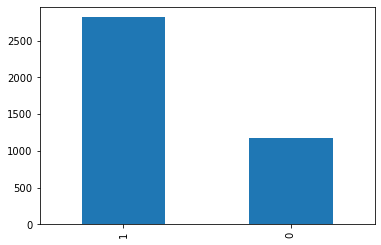

In [129]:
New_df['Gender'].value_counts() 
New_df['Gender'].value_counts().plot(kind='bar')

In [130]:
New_df['Gender'].value_counts(dropna=False)

# 0 male, 1=female

1    2818
0    1182
Name: Gender, dtype: int64

In [131]:
New_df['Gender'].value_counts(normalize=True)

1    0.7045
0    0.2955
Name: Gender, dtype: float64

### 1.2 Bar Graph of Florence 

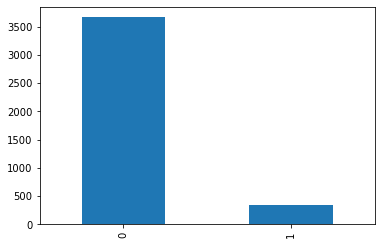

In [132]:
New_df['Yes_Florence'].value_counts() 
New_df['Yes_Florence'].value_counts().plot(kind='bar')

### 2.1 Group the data by Florence

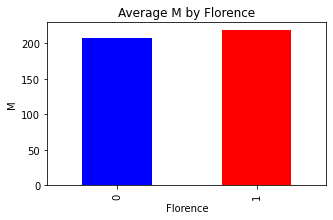

In [133]:
Florence_avg = New_df.groupby('Florence').mean()
m_avg = Florence_avg.M
f_avg = Florence_avg.F
r_avg = Florence_avg.R

m_avg.plot(kind='bar', figsize=[5, 3], color=['b','r'])
plt.title("Average M by Florence")
plt.xlabel("Florence")
plt.ylabel("M")
plt.show()

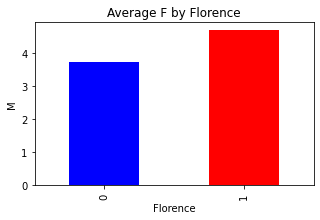

In [134]:
f_avg.plot(kind='bar', figsize=[5, 3], color=['b','r'])
plt.title("Average F by Florence")
plt.xlabel("Florence")
plt.ylabel("M")
plt.show()

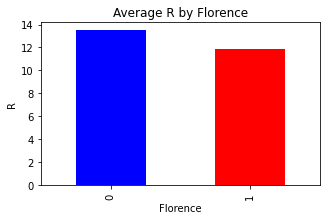

In [135]:
r_avg.plot(kind='bar', figsize=[5, 3], color=['b','r'])
plt.title("Average R by Florence")
plt.xlabel("Florence")
plt.ylabel("R")
plt.show()

### 3. Scatterplot

NameError: name 'plot' is not defined

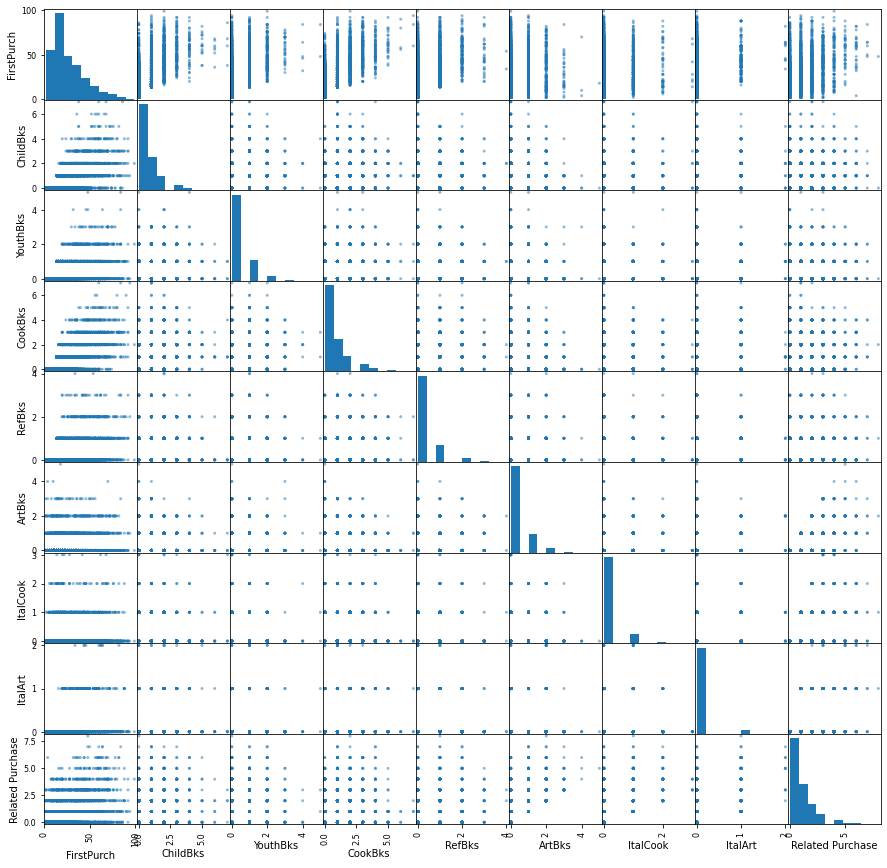

In [139]:
Scatter_df = New_df[['FirstPurch', 'ChildBks', 'YouthBks', 'CookBks', 'RefBks', 'ArtBks', 
                      'ItalCook', 'ItalArt', 'Related Purchase']]

pd.plotting.scatter_matrix(Scatter_df, figsize=(15,15), diagonal='hist')

plot.show()

### 4. Heatmap

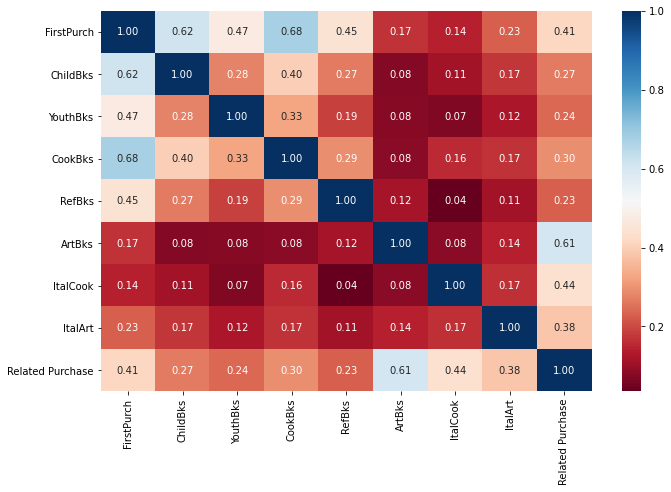

In [143]:
corr = Scatter_df.corr()

plt.figure(figsize=(11,7))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")

###  5. Side by Side Boxplot

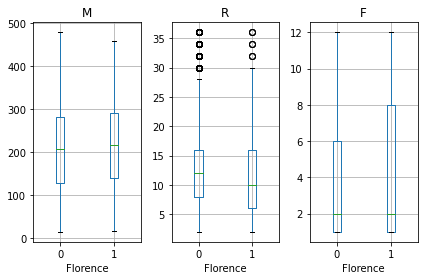

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=3)
New_df.boxplot(column="M", by="Florence", ax=axes[0])
New_df.boxplot(column="R", by="Florence", ax=axes[1])
New_df.boxplot(column="F", by="Florence", ax=axes[2])

plt.suptitle('')
plt.tight_layout()
plt.show()